# Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load Dataset and Analyse Structure

In [2]:
# Load dataset
df = pd.read_csv("loan_data.csv")

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


In [20]:
# Check for missing and duplicated values
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 0
Duplicated values: 0


# Feature wise Data Analysis

## Numerical Features

Numerical Columns: Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')


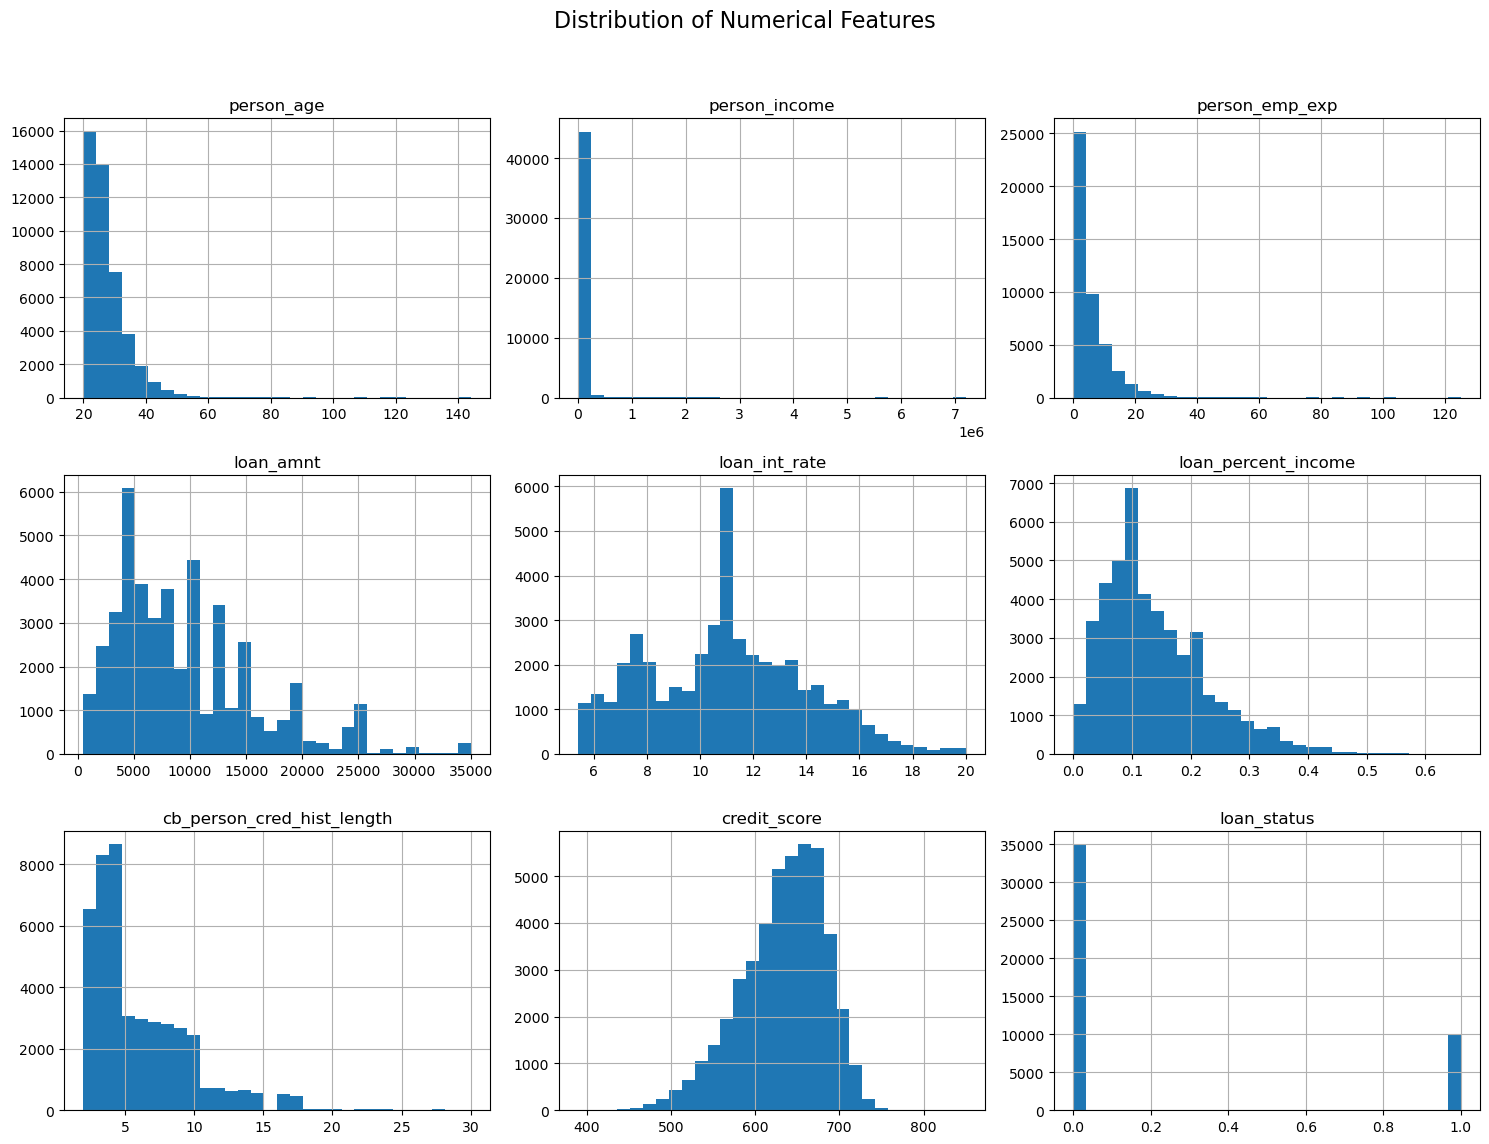

In [22]:
# Distribution of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_cols)
df[numerical_cols].hist(bins=30, figsize=(15, 12))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

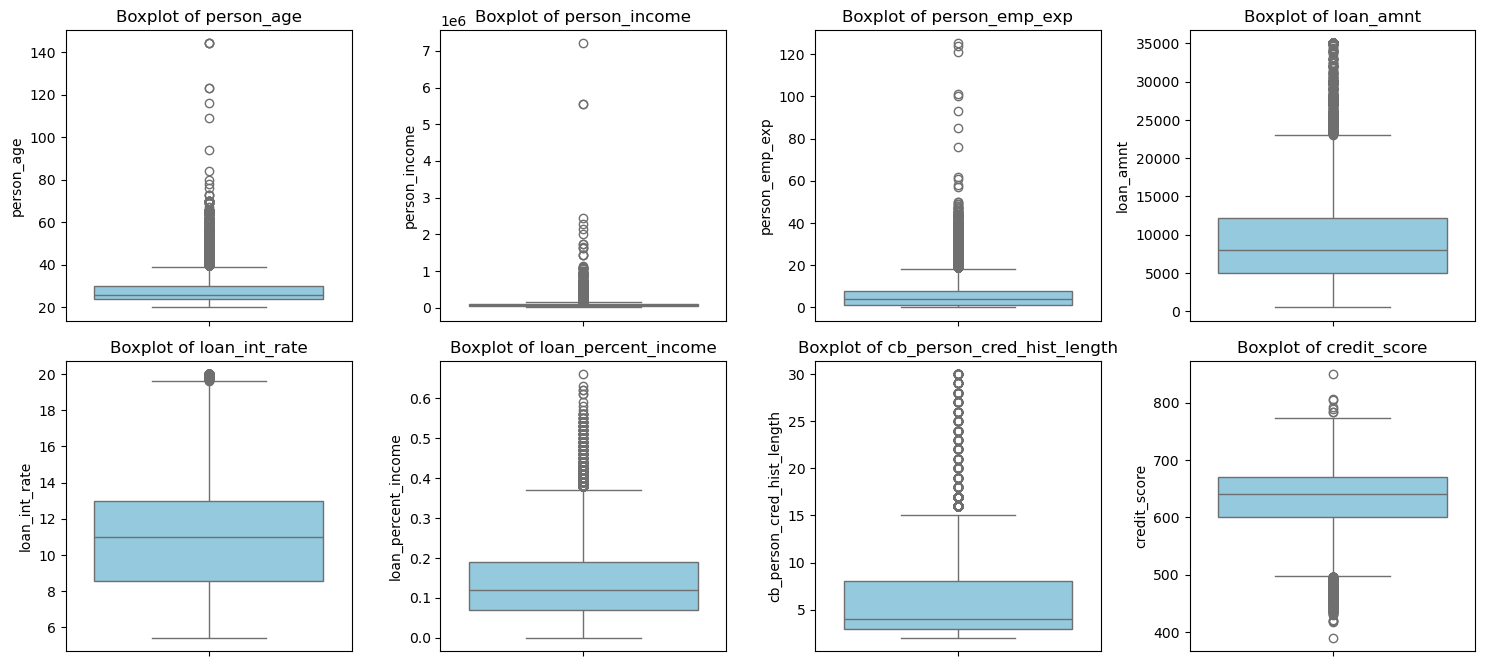

In [45]:
plt.figure(figsize=(15, 30))
for i, col in enumerate(numerical_cols, 1):
    if col == 'loan_status':
        continue
    plt.subplot(9, 4, i)  # Adjust rows and columns based on number of features
    sns.boxplot(y=col, data=df, color='skyblue')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

## Categorical Features

Categorical Columns: Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')
Unique values for column 'person_gender':
['female' 'male']
------------------------------
Unique values for column 'person_education':
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
------------------------------
Unique values for column 'person_home_ownership':
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
------------------------------
Unique values for column 'loan_intent':
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
------------------------------
Unique values for column 'previous_loan_defaults_on_file':
['No' 'Yes']
------------------------------


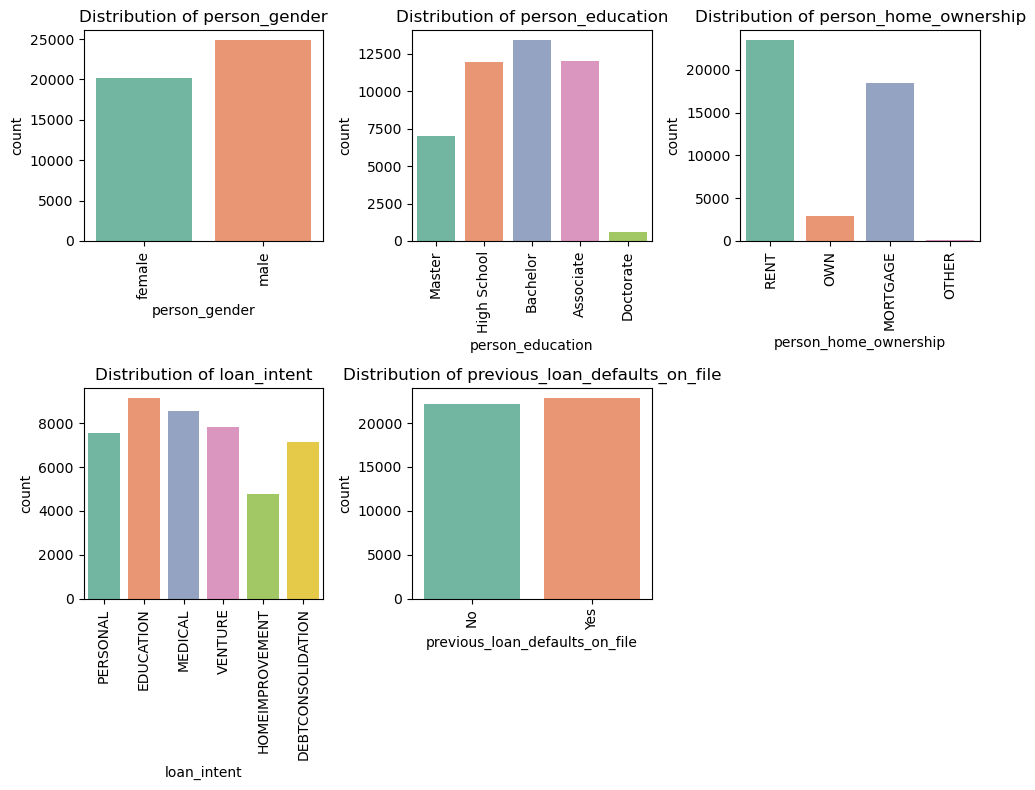

In [25]:
# Distribution of categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)
for col in categorical_cols:
    print(f"Unique values for column '{col}':")
    print(df[col].unique())
    print("-" * 30)
plt.figure(figsize=(10, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[col], palette="Set2", hue=df[col], legend=False)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Target Variable

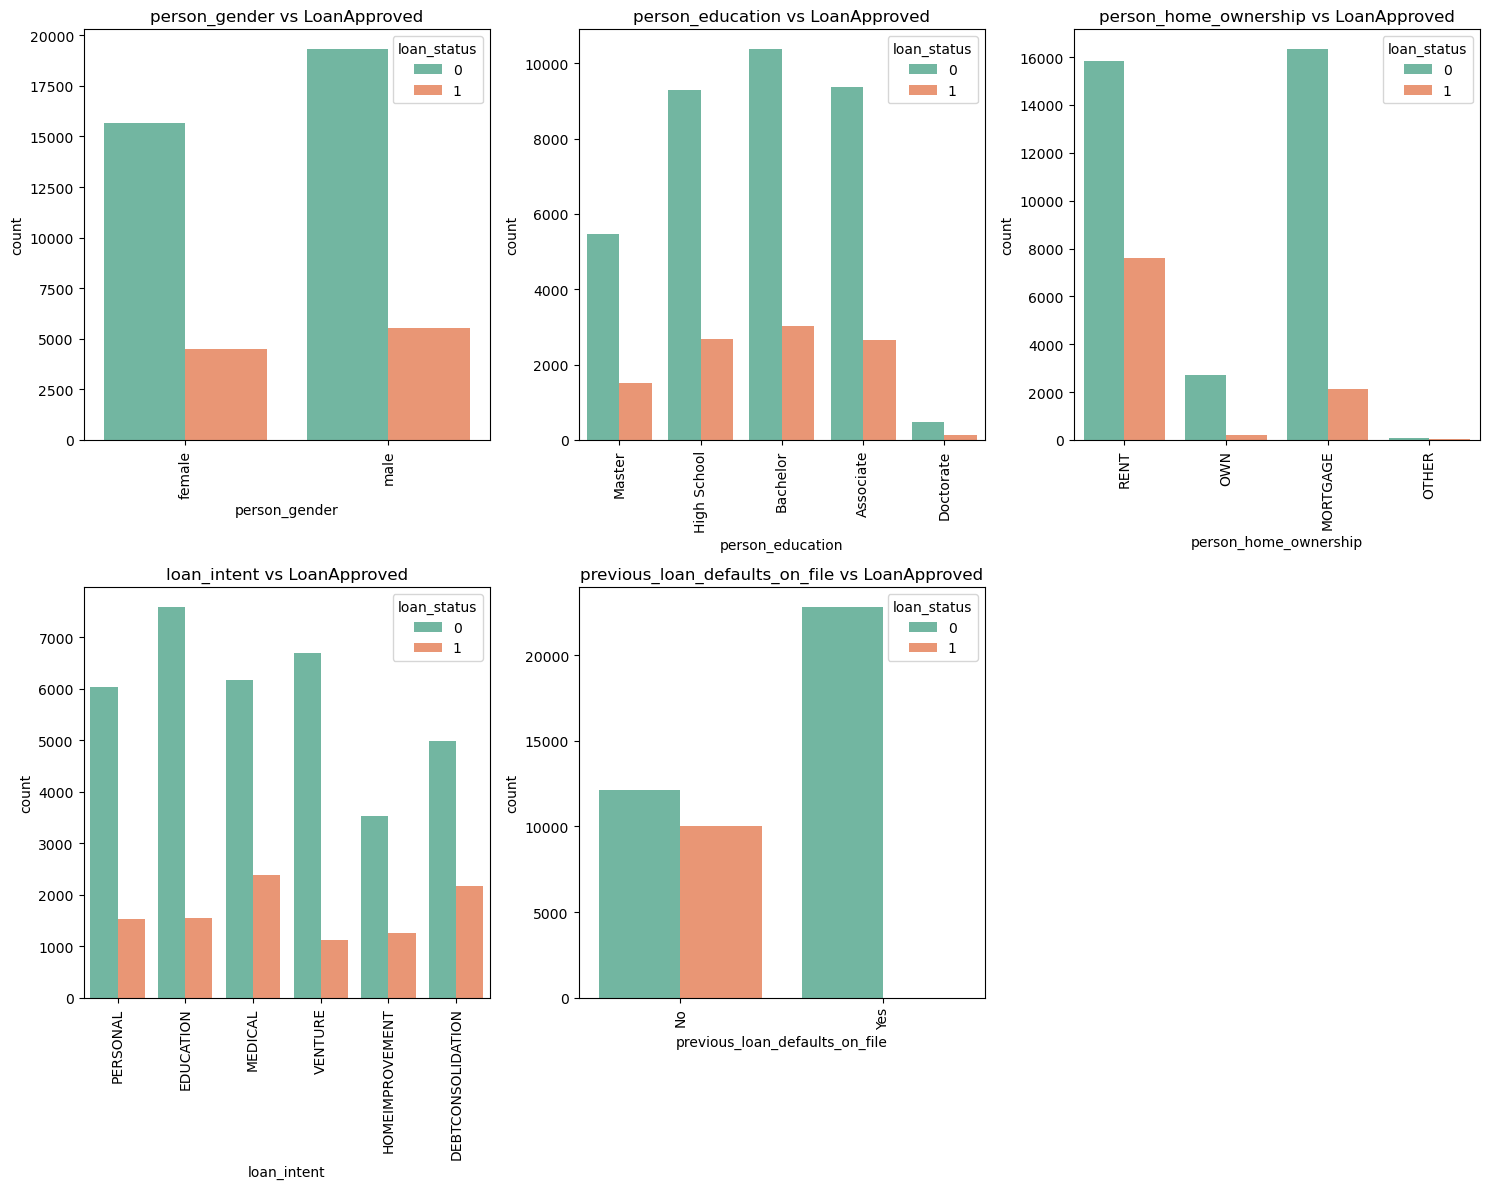

In [42]:
# Categorical features vs LoanApproved
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[col], hue=df['loan_status'], palette="Set2")
    plt.xticks(rotation=90)
    plt.title(f"{col} vs LoanApproved")
plt.tight_layout()
plt.show()

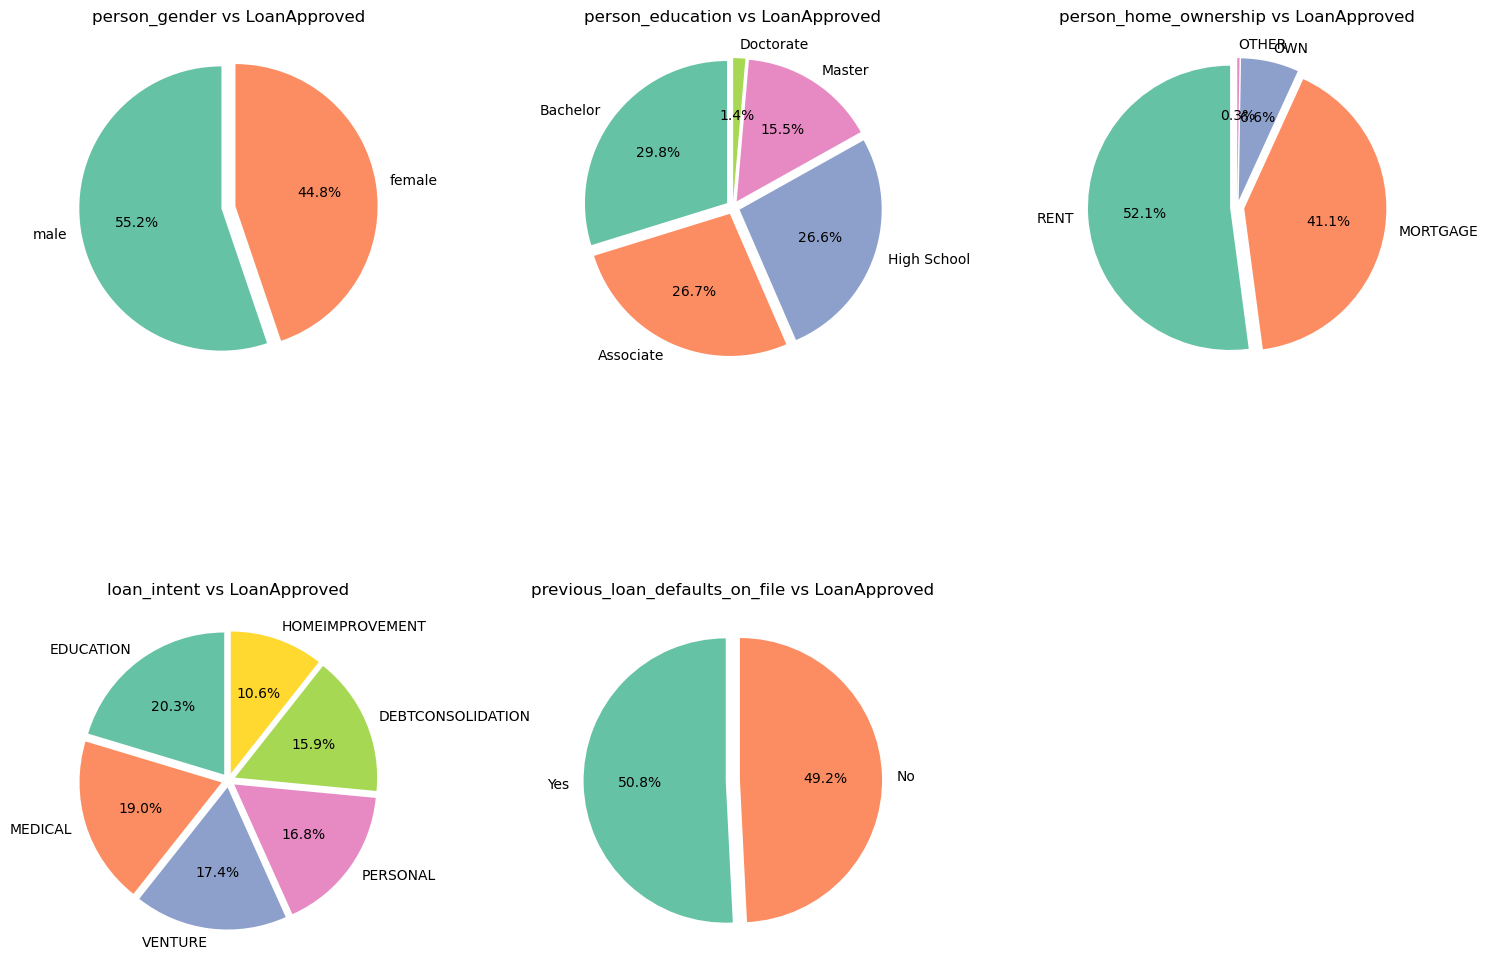

In [44]:
# Categorical features vs LoanApproved
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    value_counts = df[col].value_counts()
    value_counts.plot.pie(
        autopct='%1.1f%%',
        colors=sns.color_palette('Set2'),
        startangle=90,
        explode=[0.05] * value_counts.size
    )
    plt.ylabel('')
    plt.title(f"{col} vs LoanApproved")
plt.tight_layout()
plt.show()

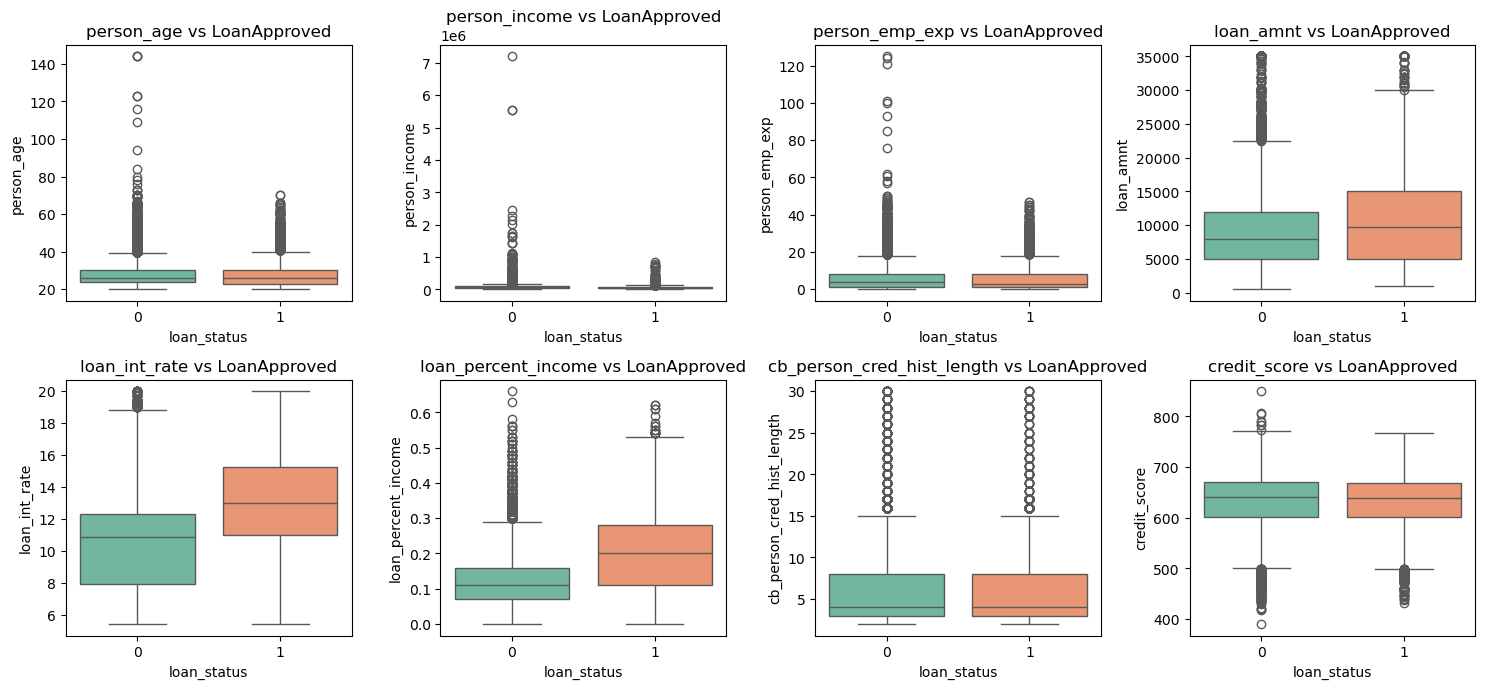

In [15]:
# Numerical features vs LoanApproved
plt.figure(figsize=(15, 30))
for i, col in enumerate(numerical_cols, 1):
    if col == 'loan_status':
        continue
    plt.subplot(9, 4, i)  # Adjust number of rows and columns
    sns.boxplot(x='loan_status', y=col, data=df, palette='Set2', hue='loan_status', legend=False)
    plt.title(f"{col} vs LoanApproved")
plt.tight_layout()
plt.show()

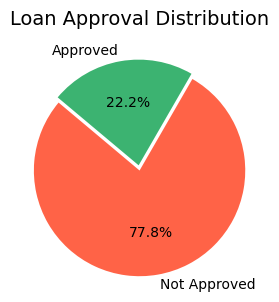

In [41]:
# Count of each category in LoanApproved
loan_counts = df['loan_status'].value_counts()

# Labels and colors
labels = ['Not Approved', 'Approved']
colors = ['tomato', 'mediumseagreen']

# Pie chart
plt.figure(figsize=(3, 3))
plt.pie(loan_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=[0.05, 0])
plt.title('Loan Approval Distribution', fontsize=14, pad=20)
plt.axis('equal')  # Ensures the pie is a circle
plt.show()

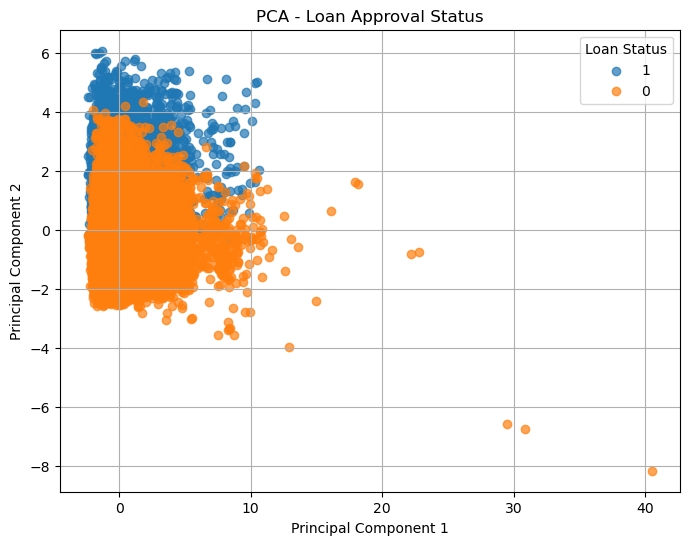

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate features and target
target_col = 'loan_status'  # Replace with your actual column name
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numeric_cols]
y = df[target_col]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results and loan status
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df[target_col] = y.values

# Plot with hue based on loan approval status
plt.figure(figsize=(8, 6))
for status in pca_df[target_col].unique():
    subset = pca_df[pca_df[target_col] == status]
    plt.scatter(subset['PC1'], subset['PC2'], label=status, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Loan Approval Status')
plt.legend(title='Loan Status')
plt.grid(True)
plt.show()